<a href="https://colab.research.google.com/github/anupbagale/Image_Processing/blob/main/Otsu_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [18]:
image_path= "/content/drive/MyDrive/image_processing_lab/leena_img.png"

### Perform Otsu's thresholding to segment the image into foreground and background.


In [19]:
def otsu_thresholding(image):
  histogram,_ =np.histogram(image.flatten(), 256, [0, 256])  # Compute the histogram of the flattened image
  total_pixels=image.size
  cumulative_sum=np.cumsum(histogram)  # Cumulative sum of the histogram values
  cumulative_mean=np.cumsum(histogram*np.arange(256)) # Cumulative mean of the histogram values
  global_mean=cumulative_mean[-1]/total_pixels  # Global mean (mean of all pixel intensities
  between_class_variance=((global_mean*cumulative_sum-cumulative_mean)**2)/(cumulative_sum*(total_pixels-cumulative_sum))  # Between-class variance
  between_class_variance = np.nan_to_num(between_class_variance)  # Replace NaN values with 0
  optimal_threshold=np.argmax(between_class_variance)  # Find the threshold value with the maximum between-class variance
  otsu_image = (image >= optimal_threshold).astype(np.uint8) * 255  # Apply the optimal threshold to the image

  return optimal_threshold, otsu_image

In [20]:
image= cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [22]:
optimal_threshold, otsu_image= otsu_thresholding(image)  # Perform Otsu's thresholding

<ipython-input-19-c075a20276a5>:7: RuntimeWarning: invalid value encountered in divide
  between_class_variance=((global_mean*cumulative_sum-cumulative_mean)**2)/(cumulative_sum*(total_pixels-cumulative_sum))


In [23]:
print(f'The threshold value is {optimal_threshold}')

The threshold value is 124


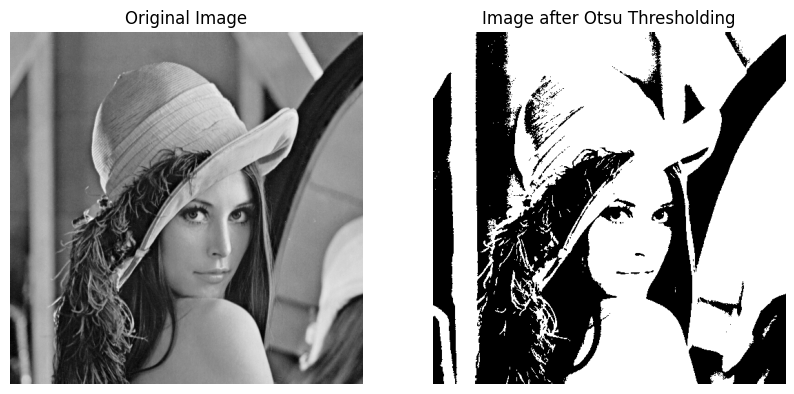

In [26]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(otsu_image, cmap='gray')
plt.title('Image after Otsu Thresholding')
plt.axis('off')

plt.show()